# SVM

- Works well for higher-dimensional data (lots of features)

What it does: Finds higher-dimensional *support vectors* across which to divide the data (mathematically, these support vectors define hyperplanes)

- Uses *kernel trick* to represent data in higher-dimensional spaces to find hyperplanes that might not be apparent in lower dimensions

Support vector machines (SVMs) are a set of **supervised** learning methods used for classification, regression and outliers detection

## SVC - Classification

In practice you'll use SVC to classify data using SVM.

It's possible to use different 'kernels with SVC.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

In [9]:
import numpy as np
import random

Fake cluster data

In [10]:
def createClusteredData(N,k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range(k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid,10000.0),
                      np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)

    return X, y

In [3]:
import matplotlib.pyplot as plt
from pylab import *
from sklearn.preprocessing import MinMaxScaler

In [11]:
X,y = createClusteredData(100,5)

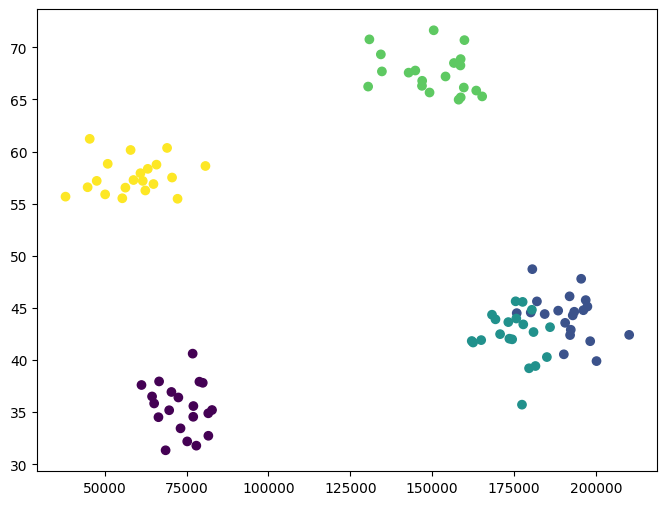

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c = y.astype(float))
plt.show()

SVC needs data to be normalized (specially for polynomial kernel)

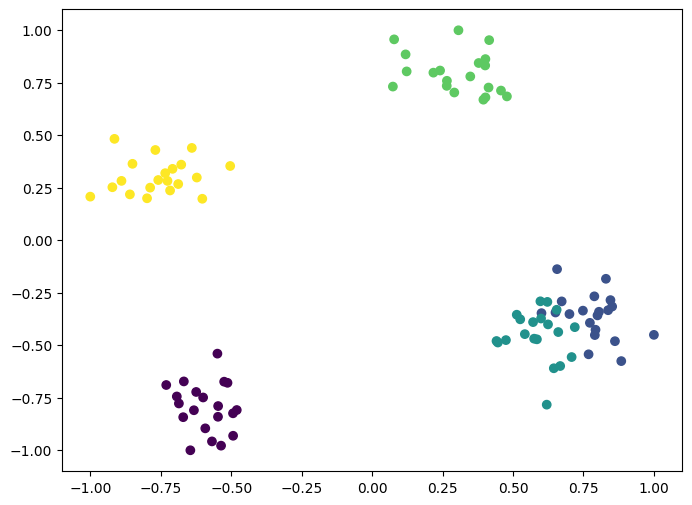

In [16]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c = y.astype(float))
plt.show()

In [18]:
from sklearn import svm, datasets

In [19]:
C=1.0
svc = svm.SVC(kernel='linear', C=C).fit(X,y)

In [29]:
def plotPredictions(clf):
    #create a dense grid of points to sample
    xx, yy = np.meshgrid(np.arange(-1,1,.001),
                         np.arange(-1,1,.001))
    
    #convert to numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()

    # convert to a list of 2d (income and age) points
    samplePoints = np.c_[npx, npy]

    #generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8,6))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
    plt.scatter(X[:,0], X[:,1], c = y.astype(float))
    plt.show()


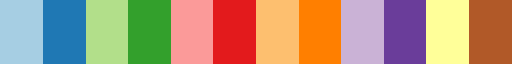

In [34]:
plt.cm.Paired

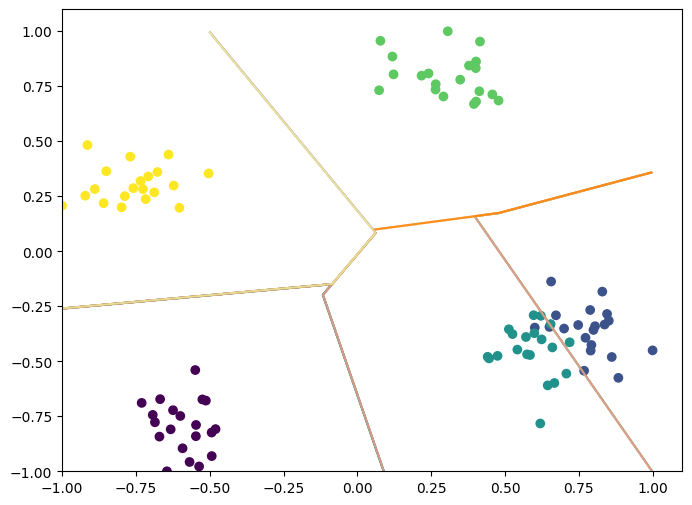

In [30]:
plotPredictions(svc)

In [31]:
C=1.0
svc = svm.SVC(kernel='poly', C=C).fit(X,y)

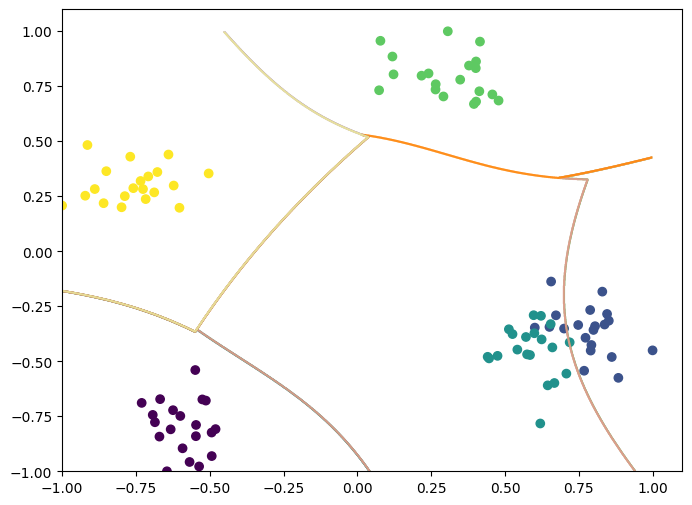

In [32]:
plotPredictions(svc)